In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization # ACO
from algorithms.ADPE_AntColonyOptimization import ADPE_AntColonyOptimization # ADPE ACO
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization # PSO
from algorithms.FireflyAlgorithm import FireflyAlgorithm # AFFA
from algorithms.GaussianFireflyAlgorithm import GaussianFireflyAlgorithm # GD-FF

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Creating an environment

We create the environment that will be used by all the nature-inspired algorithms.

We start by declaring the parameters:

In [2]:
# Please keep your parameters for the environment easily changeable here

# Environment parameters
width = 40
height = 40
start_pos = Coordinate(2, 2)
end_pos = Coordinate(38, 38)
obstacles = [(2.5, 0.2), (1.5, 0.1)]  # We generate an obstacle of radius 2 with frequency 11% and obstacles of radius 1 with frequency 1.8%
obstacle_distance = 1

# Algorithm parameters
step_size = 1
trail = 1.0
convergence_iter = 3500

Next, we create the environment and visualize it.

Finished preparing the environment


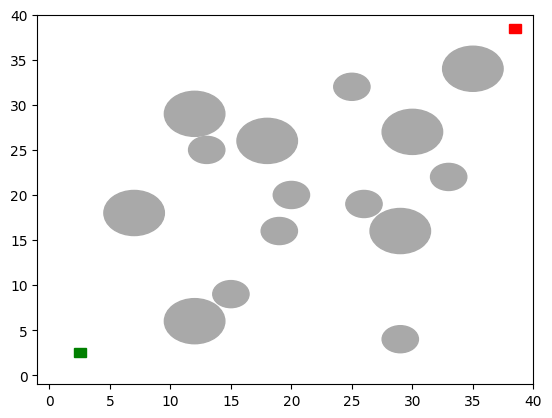

In [4]:
# Use the environment variables already declared above
# This environment will be used by all the algorithms
environment = Environment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
# Initialize the path specification for the path to be found
spec = PathSpecification(start_pos, end_pos)

# Show the environment
environment.visualize()

# Ant Colony Optimization

First, we initialize the variables we will be using for ACO.

In [4]:
# Please keep your parameters for the ACO easily changeable here
aco_agents_per_generation = 30
aco_no_generations = 50
aco_q = 500
aco_evaporation = 0.5
aco_no_change_iter = 30

Next, we build the environment and other necessary objects. ACO, unlike the other algorithms, requires a custom environment object.

In [5]:
# Construct the optimization objects
aco_environment = ACOEnvironment.create_from_environment(environment)
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, step_size, num_processes=6)

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 250


Generation 1
Routes found so far: 30
Best route's length: 250


Generation 2
Routes found so far: 30
Best route's length: 217


Generation 3
Routes found so far: 30
Best route's length: 217


Generation 4
Routes found so far: 30
Best route's length: 217


Generation 5
Routes found so far: 30
Best route's length: 217


Generation 6
Routes found so far: 30
Best route's length: 217


Generation 7
Routes found so far: 30
Best route's length: 217


Generation 8
Routes found so far: 30
Best route's length: 217


Generation 9
Routes found so far: 30
Best route's length: 217


Generation 10
Routes found so far: 30
Best route's length: 169


Generation 11
Routes found so far: 30
Best route's length: 169


Generation 12
Routes found so far: 30
Best route's length: 169


Generation 13
Routes found so far: 30
Best route's length: 169


Generation 14
Routes found so far: 30
Best route's length: 169


Generation 15
Routes fo

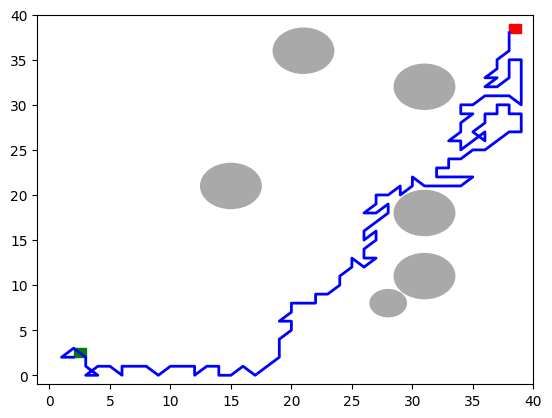

In [6]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run ACO
shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
aco_environment.visualize(shortest_route)

#### Speed of convergence

Finished preparing the board
Generation 0
Routes found so far: 20
Best route's length: 322


Generation 1
Routes found so far: 20
Best route's length: 316


Generation 2
Routes found so far: 20
Best route's length: 238


Generation 3
Routes found so far: 20
Best route's length: 238


Generation 4
Routes found so far: 20
Best route's length: 212


Generation 5
Routes found so far: 20
Best route's length: 212


Generation 6
Routes found so far: 20
Best route's length: 212


Generation 7
Routes found so far: 20
Best route's length: 120


Generation 8
Routes found so far: 20
Best route's length: 120


Generation 9
Routes found so far: 20
Best route's length: 120


Generation 10
Routes found so far: 20
Best route's length: 120


Generation 11
Routes found so far: 20
Best route's length: 120


Generation 12
Routes found so far: 20
Best route's length: 120


Generation 13
Routes found so far: 20
Best route's length: 120


Generation 14
Routes found so far: 20
Best route's length: 120


Genera

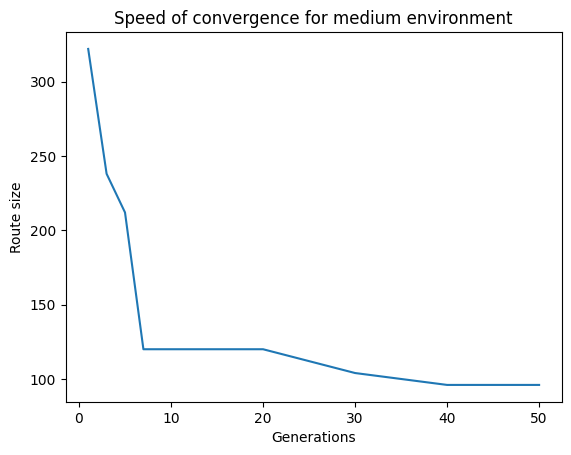

In [8]:
aco_agents_per_generation = 20
aco_no_generations = 50
aco_q = 200
aco_evaporation = 0.2
new_convergence_iter = 10000
aco_no_change_iter = 50
aco_sigma_elite = 50

# Create environment
aco_environment.reset()

# Start ACO Algorithm
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, new_convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)

plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()

# Adaptive Dynamic Probabilistic Ant Colony Optimization

We start by declaring an additional parameter for ADPE ACO:

In [7]:
aco_sigma_elite = 50

We build the environment and other necessary objects.

In [8]:
# Construct the optimization objects
aco_environment = ACOEnvironment.create_from_environment(environment)
adpe_aco = ADPE_AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, step_size, num_processes=6)

Next, we run the ADPE ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 250


Generation 1
Routes found so far: 30
Best route's length: 250


Generation 2
Routes found so far: 30
Best route's length: 217


Generation 3
Routes found so far: 30
Best route's length: 217


Generation 4
Routes found so far: 30
Best route's length: 184


Generation 5
Routes found so far: 30
Best route's length: 184


Generation 6
Routes found so far: 30
Best route's length: 184


Generation 7
Routes found so far: 30
Best route's length: 184


Generation 8
Routes found so far: 30
Best route's length: 184


Generation 9
Routes found so far: 30
Best route's length: 184


Generation 10
Routes found so far: 30
Best route's length: 184


Generation 11
Routes found so far: 30
Best route's length: 184


Generation 12
Routes found so far: 30
Best route's length: 184


Generation 13
Routes found so far: 30
Best route's length: 184


Generation 14
Routes found so far: 30
Best route's length: 184


Generation 15
Routes fo

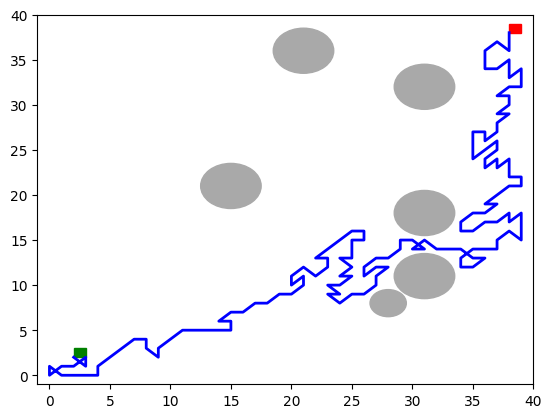

In [9]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run ADPE ACO
shortest_route, checkpoints = adpe_aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
aco_environment.visualize(shortest_route)

# Particle Swarm Optimization

We declare the necessary parameters for the Particle Swarm Optimization algorithm.

In [13]:
# Parameters specifically for PSO
pso_num_iterations = 500  # To let Lévy flights get out of local optima eventually
pso_inertia_weight = 1.0  # Currently irrelevant as adapted from acceleration coefficients, but given for completeness
pso_num_particles = 100  # The number of particles generated initially to run pso on

Next, we run the Particle Swarm Optimization algorithm and print the results.

Started PSO
2.7100777605962794, 2.7096944389760638
3.418394077334137, 3.4500311686515945
5.0204106767599885, 4.895934317172556
6.596330440600907, 6.507426512132946
8.197787275565682, 8.215421711675702
9.871771526360815, 9.920336898629795
11.53004337007825, 11.580186090857469
13.162793854071289, 13.308742388884552
14.719365108719755, 15.012979905648438
16.341456154813123, 16.675376771407507
17.885008385036965, 18.371846774341204
19.474616683777132, 19.938953484544694
21.15274823551119, 21.637178205097317
22.66023146080684, 23.201776812824615
24.312301874916425, 24.850554168511557
25.965074046088983, 26.492555161357455
27.574696400347193, 28.12562404417977
29.154233679423502, 29.70869376651698
30.797805993729014, 31.358544852707993
32.4159084622272, 32.935701571116375
34.04833683219515, 34.58720378668786
35.7258884485775, 36.26349924165115
37.41048823201857, 37.938111941705436
37.742050862953306, 38.25665042093463
Time taken: 0.084
Route size: 26


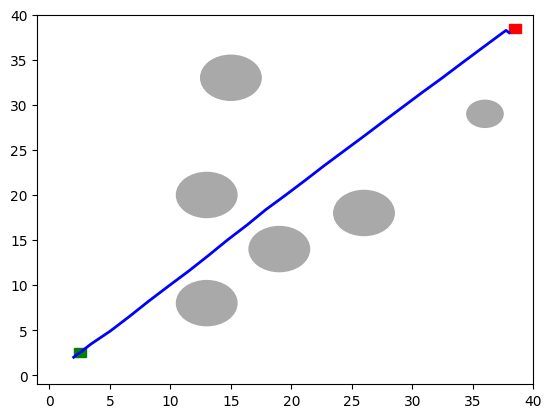

In [14]:
# Initialize PSO
pso = ParticleSwarmOptimization(environment, spec, pso_num_particles, convergence_iter, trail, step_size, pso_inertia_weight, pso_num_iterations)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# Run PSO
shortest_route, checkpoints = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size; not really relevant for pso as it adds global bests and may get stuck for a bit
# Normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize(shortest_route)

# Firefly algorithm

We declare the necessary parameters for the Firefly algorithm.

In [5]:
fa_population_size = 100
fa_alpha_init = 1  # Є [0,1]
fa_alpha_final = 0.01  # Є [0,1]
fa_beta = 1  # Є [0,1]
fa_gamma_init = 0.1  # it is suggested Є [0,10]
fa_gamma_final = 5  # it is suggested Є [0,10]
fa_max_iter = 100

Next, we run the Firefly algorithm (AFFA) and print the results.

Started FA
-48.05182712789364
-45.31836989735682
-45.27437416723213
-41.58099697779544
-41.48992881560736
-41.458812670122676
-41.442858469102184
-41.417201157113155
-38.88339029079973
-38.8796820756591
-38.87372844411568
-38.80932660564706
-38.33991912364696
-38.24077748397443
-38.18075760354662
-38.166953001635555
-38.10703531722235
-35.68390211244771
-35.57573164429463
-34.528814260779804
-34.46374180168558
-34.393679310834635
-34.36941927044907
-31.3260785866788
-31.324496817625405
-31.20175679573896
-31.168174145624175
-31.120663464010157
-27.492604184382905
-27.476022416588577
-27.42168514120953
-27.420394896147535
-27.307362812121692
-27.234957487130515
-27.107759129548413
-23.06770663265182
-23.006577675407357
-22.958461555604288
-22.903392982421916
-22.88099214952487
-21.06806024341604
-20.84207872044897
-20.754977158813826
-20.747123554357156
-20.724328719387803
-20.721241655137977
-19.154593228038134
-16.075326196844554
-16.018106199544164
-15.503533587209029
-15.44794028974

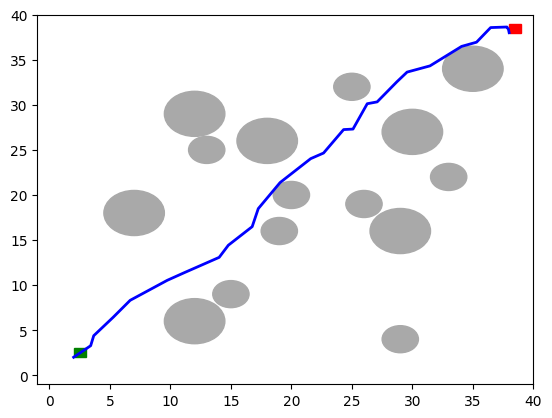

In [6]:
# Initialize FA
fa = FireflyAlgorithm(environment, spec, fa_population_size, fa_alpha_init, fa_alpha_final, fa_gamma_init, fa_gamma_final, fa_beta, fa_max_iter, obstacle_distance)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started FA")

# Run FA
shortest_route, checkpoints = fa.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
# Normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize(shortest_route)

# Gaussian Firefly algorithm

We declare the necessary parameters for the Gaussian Firefly algorithm.

In [ ]:
ga_population_size = 100
ga_alpha_init = 1 # Є [0,1]
ga_alpha_final = 0.01 # Є [0,1]
ga_beta = 1 # Є [0,1]
ga_gamma_init = 0.1 # it is suggested Є [0,10]
ga_gamma_final = 5 # it is suggested Є [0,10]
ga_max_iter = 100

Next, we run the Gaussian Firefly algorithm (GD-FF) and print the results.

In [ ]:
# Initialize GD-FF
ga = GaussianFireflyAlgorithm(environment, spec, ga_population_size, ga_alpha_init, ga_alpha_final, ga_gamma_init, ga_gamma_final, ga_beta, ga_max_iter, obstacle_distance)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started FA")

# Run GD-FF
shortest_route, checkpoints = ga.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
# normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize(shortest_route)